In [1]:
# import all dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# link engine to database path
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Use the inspector to get the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# use get_columns to get all the columns names in the measurement table
columns_measurement = inspector.get_columns('measurement')
for column in columns_measurement:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# use get_columns to get all the columns names in the station table
columns_station = inspector.get_columns('station')
for column in columns_station:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [13]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [14]:
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [16]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Save last date as variable
last_date = dt.date(2017, 8, 23)
last_date

datetime.date(2017, 8, 23)

In [18]:
# Calculate the date 1 year ago from the last data point in the database
last12months = last_date - dt.timedelta(days=365)
print(last12months)

2016-08-23


In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Perform a query to retrieve the data and precipitation scores
# Sort the dataframe by date
sel = [Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]
precipitation_last12months = session.query(*sel).filter(Measurement.date >= last12months).order_by(Measurement.date).all()
precipitation_last12months

[(2364, 'USC00519397', '2016-08-23', 0.0, 81.0),
 (5091, 'USC00513117', '2016-08-23', 0.15, 76.0),
 (7331, 'USC00514830', '2016-08-23', 0.05, 80.0),
 (8825, 'USC00517948', '2016-08-23', None, 80.0),
 (11851, 'USC00519523', '2016-08-23', 0.02, 80.0),
 (14608, 'USC00519281', '2016-08-23', 1.79, 77.0),
 (19202, 'USC00516128', '2016-08-23', 0.7, 74.0),
 (2365, 'USC00519397', '2016-08-24', 0.08, 79.0),
 (5092, 'USC00513117', '2016-08-24', 2.15, 76.0),
 (7332, 'USC00514830', '2016-08-24', 2.28, 80.0),
 (8826, 'USC00517948', '2016-08-24', None, 78.0),
 (11852, 'USC00519523', '2016-08-24', 1.22, 79.0),
 (14609, 'USC00519281', '2016-08-24', 2.15, 77.0),
 (19203, 'USC00516128', '2016-08-24', 1.45, 74.0),
 (2366, 'USC00519397', '2016-08-25', 0.08, 80.0),
 (5093, 'USC00513117', '2016-08-25', 0.08, 77.0),
 (7333, 'USC00514830', '2016-08-25', 0.0, 81.0),
 (8827, 'USC00517948', '2016-08-25', 0.0, 81.0),
 (11853, 'USC00519523', '2016-08-25', 0.21, 80.0),
 (14610, 'USC00519281', '2016-08-25', 0.06, 80.

In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_year_precip = pd.DataFrame(precipitation_last12months, columns=['Id', 'Station', 'Date', 'prcp', 'tobs'])
last_year_precip.head()

,Id,Station,Date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,5091,USC00513117,2016-08-23,0.15,76.0
2,7331,USC00514830,2016-08-23,0.05,80.0
3,8825,USC00517948,2016-08-23,NaN,80.0
4,11851,USC00519523,2016-08-23,0.02,80.0


In [21]:
# Select only the `date` and `prcp` values.
# Sort the DataFrame values by `date`.
sel = [Measurement.date, Measurement.prcp]
precipitation_last12months_sel = session.query(*sel).filter(Measurement.date >= last12months).order_by(Measurement.date).all()
precipitation_last12months_sel

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [22]:
# Load the query results into a Pandas DataFrame and set the index to the date column.
last_year_precip_sel = pd.DataFrame(precipitation_last12months_sel, columns=['Date', 'Precipitation'])
last_year_precip_sel.head()
last_year_precip_sel.set_index('Date', inplace=True)
last_year_precip_sel.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


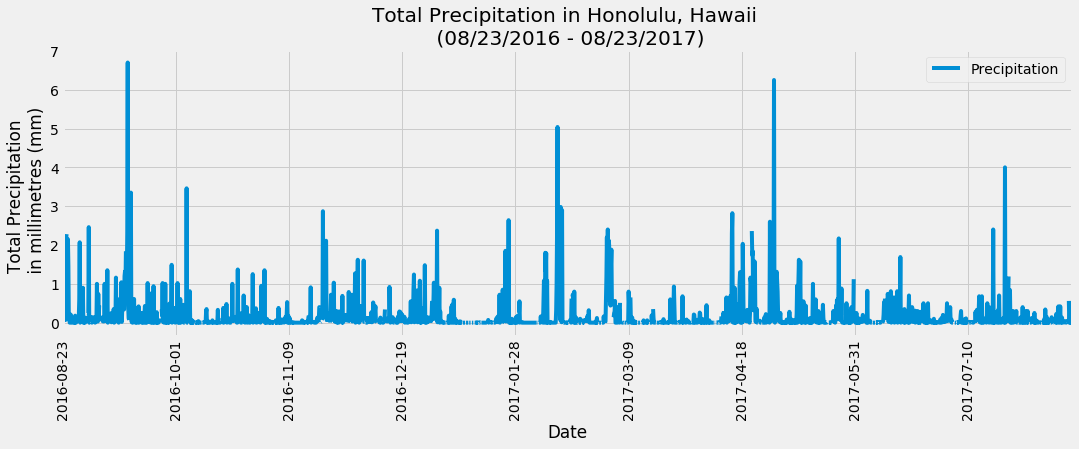

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the results using the DataFrame `plot` method.
style.use('fivethirtyeight')
last_year_precip_sel.plot(figsize=(15,5))
plt.tight_layout() # makes room for axis labels
plt.ylabel('Total Precipitation \n in millimetres (mm)')
plt.xticks(rotation=90)
plt.title("Total Precipitation in Honolulu, Hawaii \n (08/23/2016 - 08/23/2017)")
plt.savefig("Images/Total_Precip_Hawaii_year" + '.png', bbox_inches='tight')
#plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_year_precip_sel.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset? check both measurement and station databases
numberofstations_measurement = session.query(Measurement.station).distinct(Measurement.station).count()
print(numberofstations_measurement)
numberofstations_stations = session.query(Station.station).distinct(Station.station).count()
print(numberofstations_stations)

9
9


In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query(highest activity), calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel =[func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
session.query(*sel).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [28]:
# checking which station has the most observations
high_tmep_obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
high_tmep_obs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# find the first date entry for 'USC00519281'
first_date_range = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date).first()
first_date_range

('2010-01-01')

In [30]:
# find the last date entry for 'USC00519281'
last_date_range = session.query(Measurement.date).filter(Measurement.station == 'USC00519281').order_by(Measurement.date.desc()).first()
last_date_range

('2017-08-18')

In [31]:
# set the last date to a varible in datetime
last_date_high_obs = dt.date(2017, 8, 18)
last_date_high_obs

datetime.date(2017, 8, 18)

In [32]:
# find the date a year previous from the last date
first_date_high_obs = last_date_high_obs - dt.timedelta(days=365)
first_date_high_obs

datetime.date(2016, 8, 18)

In [33]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs). Grab all data to have it if needed.
sel = [Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs]
year_temp_high_obs = session.query(*sel).filter(Measurement.station == 'USC00519281').filter(Measurement.date <= last_date_high_obs).filter(Measurement.date >= first_date_high_obs).order_by(Measurement.date).all()
year_temp_high_obs

[(14603, 'USC00519281', '2016-08-18', 0.0, 80.0),
 (14604, 'USC00519281', '2016-08-19', 0.31, 79.0),
 (14605, 'USC00519281', '2016-08-20', 0.13, 81.0),
 (14606, 'USC00519281', '2016-08-21', 0.08, 79.0),
 (14607, 'USC00519281', '2016-08-22', 2.32, 78.0),
 (14608, 'USC00519281', '2016-08-23', 1.79, 77.0),
 (14609, 'USC00519281', '2016-08-24', 2.15, 77.0),
 (14610, 'USC00519281', '2016-08-25', 0.06, 80.0),
 (14611, 'USC00519281', '2016-08-26', 0.01, 80.0),
 (14612, 'USC00519281', '2016-08-27', 0.12, 75.0),
 (14613, 'USC00519281', '2016-08-28', 0.6, 73.0),
 (14614, 'USC00519281', '2016-08-29', 0.35, 78.0),
 (14615, 'USC00519281', '2016-08-30', 0.0, 77.0),
 (14616, 'USC00519281', '2016-08-31', 0.24, 78.0),
 (14617, 'USC00519281', '2016-09-01', 0.02, 80.0),
 (14618, 'USC00519281', '2016-09-02', 0.01, 80.0),
 (14619, 'USC00519281', '2016-09-03', 0.12, 78.0),
 (14620, 'USC00519281', '2016-09-04', 0.14, 78.0),
 (14621, 'USC00519281', '2016-09-05', 0.03, 78.0),
 (14622, 'USC00519281', '2016-09-0

In [34]:
# add data to dataframe and index on date, change column headers to more easily understandable headers
year_temp_high_obs_df = pd.DataFrame(year_temp_high_obs, columns=['Id', 'Station', 'Date', 'Precipitation', 'Temperature'])
year_temp_high_obs_df.head()
year_temp_high_obs_df.set_index('Date', inplace=True)
year_temp_high_obs_df.head()

,Id,Station,Precipitation,Temperature
Date,,,,
2016-08-18,14603,USC00519281,0.00,80.0
2016-08-19,14604,USC00519281,0.31,79.0
2016-08-20,14605,USC00519281,0.13,81.0
2016-08-21,14606,USC00519281,0.08,79.0
2016-08-22,14607,USC00519281,2.32,78.0


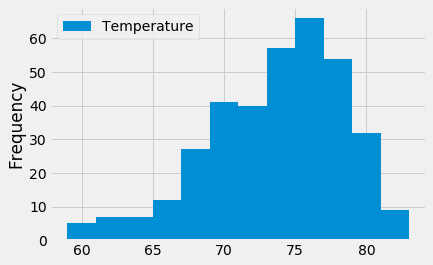

In [35]:
# plot a histogram for the years worth of temperature data (tobs = Temperature) with a bin size of 12
style.use('fivethirtyeight')
year_temp_high_obs_df["Temperature"].plot.hist(bins=12)
plt.legend()
plt.savefig("Images/temperature_histogram" + '.png', bbox_inches='tight')

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [37]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example with my vacation dates (2017-01-01 to 2017-01-14) from a year ago
print(calc_temps('2016-01-01', '2016-01-14'))
results = (calc_temps('2016-01-01', '2016-01-14'))
results

[(62.0, 69.66265060240964, 78.0)]


[(62.0, 69.66265060240964, 78.0)]

In [38]:
# convert output above to a dataframe
trip_normals = pd.DataFrame(results, columns=['min', 'avg', 'max'])
trip_normals

,min,avg,max
0,62.0,69.662651,78.0


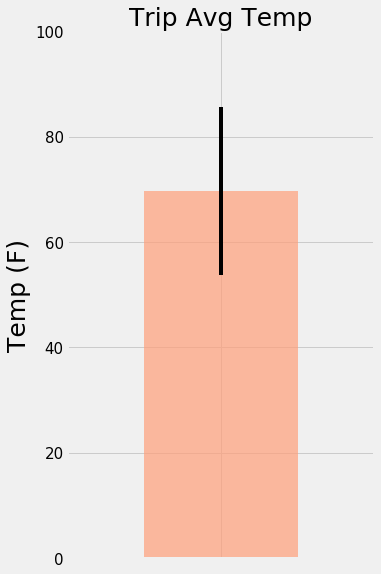

In [39]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

style.use('fivethirtyeight')
peak_to_peak = (trip_normals["max"] - trip_normals["min"])
trip_normals['avg'].plot.bar(color="#FFA07A", alpha=0.7, yerr=peak_to_peak, figsize=(5,8), fontsize=15)
plt.tight_layout() # makes room for axis labels
plt.ylabel('Temp (F)', fontsize=25)
plt.title('Trip Avg Temp', fontsize=25)
plt.ylim(0, 100)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    labelbottom=False) # labels along the bottom edge are off
#plt.show()
plt.savefig("Images/Trip_Avg_Temp" + '.png', bbox_inches='tight')

In [40]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
last_year_trip_start = dt.date(2016, 1, 1)
last_year_trip_end = dt.date(2016, 1, 14)
#print(last_year_trip_start)
#print(last_year_trip_end)
sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)]
station_join = session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date >= last_year_trip_start).filter(Measurement.date <= last_year_trip_end).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
station_join

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  2.9400000000000004),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.01),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.6100000000000001),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.54),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.23),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.13),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)]

In [41]:
# Make a dataframe so it is easier to visualize
last_year_precip_total_vacation_time = pd.DataFrame(station_join, columns=['Station', 'Station_Name', 'Station_Latitude', 'Station_Longitude', 'Station_elevation', 'Total_Precipitation_Over_Trip_Dates'])
last_year_precip_total_vacation_time

,Station,Station_Name,Station_Latitude,Station_Longitude,Station_elevation,Total_Precipitation_Over_Trip_Dates
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,2.94
1,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,1.01
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,0.61
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,0.54
4,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,0.23
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,0.13
6,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,NaN


## Optional Challenge Assignment

In [42]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# Set the start and end date of the trip
start_date_trip = '2016-01-01'
end_date_trip = '2016-01-14'
# Use the start and end date to create a range of dates
import datetime
vac_dates = []
start = datetime.datetime.strptime("2016-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2016-01-15", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
#loop through date_generated and print out all the dates as strings and append to vac_date (list)
for date in date_generated:
    print (date.strftime("%Y-%m-%d"))
    vac_dates.append(str(date))
#vac_dates

2016-01-01
2016-01-02
2016-01-03
2016-01-04
2016-01-05
2016-01-06
2016-01-07
2016-01-08
2016-01-09
2016-01-10
2016-01-11
2016-01-12
2016-01-13
2016-01-14


In [44]:
# make a dataframe from date_generated and set the column header to 'Date'
dates_df = pd.DataFrame(date_generated, columns=['Date'])
dates_df

,Date
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
5,2016-01-06
6,2016-01-07
7,2016-01-08
8,2016-01-09
9,2016-01-10


In [45]:
# make sure all dates are strings
dates_df.dtypes
dates_df['Date']= dates_df['Date'].astype(str)
dates_df
dates_df.dtypes

Date    object
dtype: object

In [46]:
# take the year off all of the dates
strip_dates = []
for date in date_generated:
    print(date.strftime("%m-%d"))

01-01
01-02
01-03
01-04
01-05
01-06
01-07
01-08
01-09
01-10
01-11
01-12
01-13
01-14


In [47]:
# alternate way of manually generating the date to test
list_of_days = ["01-01","01-02","01-03","01-04", "01-05", "01-06", "01-07", "01-08", "01-09", "01-10", "01-11", "01-12", "01-13", "01-14"]      
#days = ", ".join(list_of_days)
list_of_days

['01-01',
 '01-02',
 '01-03',
 '01-04',
 '01-05',
 '01-06',
 '01-07',
 '01-08',
 '01-09',
 '01-10',
 '01-11',
 '01-12',
 '01-13',
 '01-14']

In [48]:
for day in list_of_days:
    print(day)

01-01
01-02
01-03
01-04
01-05
01-06
01-07
01-08
01-09
01-10
01-11
01-12
01-13
01-14


In [49]:
# print all of the normals (min, avg, max) for all of the days in the vacation. output is a list of lists
normals = []
for day in list_of_days:
    def daily_normals(date):
        sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
        return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    #print(daily_normals (day))
    normals.append(daily_normals (day))
normals

[[(62.0, 69.15384615384616, 77.0)],
 [(60.0, 69.39622641509433, 77.0)],
 [(62.0, 68.9090909090909, 77.0)],
 [(58.0, 70.0, 76.0)],
 [(56.0, 67.96428571428571, 76.0)],
 [(61.0, 68.96491228070175, 76.0)],
 [(57.0, 68.54385964912281, 76.0)],
 [(57.0, 67.16071428571429, 75.0)],
 [(58.0, 67.9298245614035, 78.0)],
 [(62.0, 69.74137931034483, 77.0)],
 [(57.0, 67.3103448275862, 78.0)],
 [(57.0, 67.4074074074074, 81.0)],
 [(57.0, 67.25454545454545, 77.0)],
 [(58.0, 69.52631578947368, 77.0)]]

In [50]:
#flatten a list of lists "normals"
flatten_normals = [item for sublist in normals for item in sublist]
flatten_normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0),
 (57.0, 67.16071428571429, 75.0),
 (58.0, 67.9298245614035, 78.0),
 (62.0, 69.74137931034483, 77.0),
 (57.0, 67.3103448275862, 78.0),
 (57.0, 67.4074074074074, 81.0),
 (57.0, 67.25454545454545, 77.0),
 (58.0, 69.52631578947368, 77.0)]

In [51]:
# add to dataframe
normals_df = pd.DataFrame(flatten_normals, columns=['tmin', 'tavg', 'tmax'])
normals_df

,tmin,tavg,tmax
0,62.0,69.153846,77.0
1,60.0,69.396226,77.0
2,62.0,68.909091,77.0
3,58.0,70.000000,76.0
4,56.0,67.964286,76.0
5,61.0,68.964912,76.0
6,57.0,68.543860,76.0
7,57.0,67.160714,75.0
8,58.0,67.929825,78.0
9,62.0,69.741379,77.0


In [52]:
# concat the dates to the normals df and set index to date
combined_df = pd.concat([dates_df, normals_df], axis=1, sort=False)
combined_df.set_index('Date', inplace=True)
combined_df

,tmin,tavg,tmax
Date,,,
2016-01-01,62.0,69.153846,77.0
2016-01-02,60.0,69.396226,77.0
2016-01-03,62.0,68.909091,77.0
2016-01-04,58.0,70.000000,76.0
2016-01-05,56.0,67.964286,76.0
2016-01-06,61.0,68.964912,76.0
2016-01-07,57.0,68.543860,76.0
2016-01-08,57.0,67.160714,75.0
2016-01-09,58.0,67.929825,78.0


In [53]:
# check dtypes
combined_df.dtypes

tmin    float64
tavg    float64
tmax    float64
dtype: object

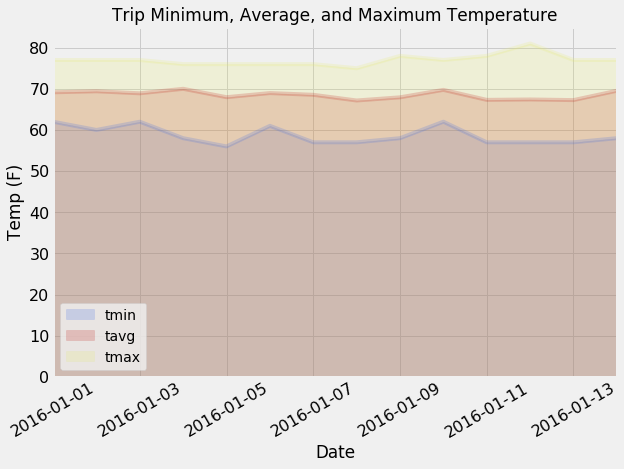

In [54]:
style.use('fivethirtyeight')
pal = ["#3c6ae7", "#bd1913", "#e6eb6e"]
combined_df.plot.area(alpha=0.2, stacked=False, color=pal, fontsize = 16, figsize=(9,6))
plt.ylabel('Temp (F)', fontsize=17)
plt.title('Trip Minimum, Average, and Maximum Temperature', fontsize=17)
plt.xticks(rotation=30)
plt.savefig("Images/Area_plot_temp_normals_over_vacation" + '.png', bbox_inches='tight')